# Plots

Here are some options you can provide to control the plotting output of the pipeline.

In the `create_pipeline` function, you can provide a dictionary to the `plot` argument. Possible
options are:

- `figsize`: a tuple of two values allowing you to control the size of the plot in terms of width
and height, respectively.
- `show_axes`: if `True`, display the axes and their labels. It's unusual to see this in most output
but it can come in very handy for debugging, because unexpectedly large or small ranges on the axes
often means something has gone wrong.
- `equal_axes`: make the aspect ratio of the plot the same. If you have set `figsize` directly the
smaller of the two values is chosen as the size of the plot.
- `pc_axes`: rotate the embedding so the principal axes are aligned with the x and y axes. This
doesn't distort the embedding. Useful for datasets where one axis is a lot longer than the other
and this will maximize the use of the space in the chart (usually this only matters for synthetic
datasets).
- `palette`: you can pass one of the named [matplotlib colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html),
e.g. `"inferno"`.
- `legend`: if `false`, don't show it. If `true` (the default) it may get hidden anyway if the 
internals of drnb deem it to be large to show on screen. To ensure it's always shown, set
`legend="force"`.
- `cex`: the point size. Name is borrowed from R (sorry).
- `alpha_scale`: the amount of opacity to the colors of the scatter points.
- `title`: the title of the plot.
- `vmin`, `vmax` if showing a color bar (see `Diagnostic Plots` below for example), this sets the
color range for the color bar.

There are two other settings that need extra explanation but honestly that useful without using
the functions that help populate them:

- `color_by`: produce plots where each point is colored by a scalar value associated with that item.
- `extras`: some non-scatter plots that give a different view of the distribution of point-wise 
data.

Note that these extra charts don't use any of the other settings above, i.e. they will not respond
to setting `figsize`, `alpha_scale`, `cex`. You will have to specify any fine-grained control within
`color_by` or `extras` (see `Configuring Extra Plots` below).

In [1]:
import drnb.embed.pipeline as pl


## Diagnostic Plots in `color_by`

Some diagnostic plots are available where I attempt to color the embedding by a suitable scalar
pointwise evaluation of some kind. Not all metrics are amenable to a pointwise decomposition.

If you provide a `plot` argument to `create_pipeline`, you can provide


A reasonable set of diagnostic plots can be generated by using the `pl.diag_plots()` function. If
you don't like my default choices, feel free to take a look in the submodules of `drnb.plot.scale`
to find all the currently supported `ColorBy` objects. The `ColorScale` can be found in the
`drnb.plot.scale` module.

In [2]:
pl.diag_plots()

[('ko', {'n_neighbors': 15, 'color_scale': {'palette': 'Spectral'}}),
 ('so', {'n_neighbors': 15, 'color_scale': {'palette': 'Spectral'}}),
 ('lid',
  {'n_neighbors': 15,
   'metric': 'euclidean',
   'color_scale': {'palette': 'Spectral'}}),
 ('nbrpres',
  {'n_neighbors': 15,
   'color_scale': {'palette': 'Spectral'},
   'metric': 'euclidean'}),
 ('rte',
  {'n_triplets_per_point': 5,
   'color_scale': {'palette': 'Spectral'},
   'metric': 'euclidean'})]

The current choices are:

- `ko` -- color by the k-occurrence. A measure of hubness. Bigger means an item is considered
a neighbor by a larger number of other items in the dataset. The value of the k-occurrence can go
between 0 and N.
- `so` -- color by the s-occurrence. Another measure of hubness. Bigger means an item appears
as a neighbor of its own neighbors (rather than the whole dataset as measured by k-occurrence).
- `lid` -- color by the local intrinsic dimension estimate, using the nearest neighbor approach
of [Levina and Bickel](https://papers.nips.cc/paper_files/paper/2004/hash/74934548253bcab8490ebd74afed7031-Abstract.html).
- `nbrpres`` -- color by neighbor preservation: of the k-nearest neighbors of each item in the
2D output, how many of the high-dimensional neighbors are preserved? Normalized to a number between
0 (no neighbors preserved) and 1 (all of them).
- `rte` -- color by random triplet evaluation: The triangle distances between three randomly
sampled points are evaluated in the low and high dimensions and the RTE is the proportion of those
ordered distances where the ordering is the same in the high and low dimensions. 5 triplets are
used for each item in the dataset.

For all metrics involving nearest neighbors, the default number is 15 and the color map is 
`Spectral`. If you don't want to change those parameters, you can just provide the names, e.g. 
`extras=["ko", "so", "lid", "rte"]` would do the same thing.


## Extra Plots

These plots don't visualize the embedded coordinates and they mainly work on the same data as that
used by the ColorBy charts: pointwise decomposition of some quality of the embedding. The simplest
way to work with them is to pass in a list of names of charts. The currently supported charts are:

- `nnphist` -- a histogram of the nearest neighbor preservation values.
- `rthist` -- a histogram of the random triplet preservation values.
- `rpscatter` -- a scatter plot of embedded against ambient distances. Distances are sampled
randomly with 5 distances sampled per point in the dataset.
- `lidhist` -- a histogram of the local intrinsic dimensionality (once again using the Levina-Bickel
method).

If you call `pl.extra_plots()` you get all of these.

If you want to know more about these plots, look in the `drnb.plot` submodules.

In [3]:
pl.extra_plots()

[('nnphist', {'metric': 'euclidean'}),
 ('rthist', {'metric': 'euclidean'}),
 ('rpscatter', {'metric': 'euclidean'}),
 ('lidhist', {'metric': 'euclidean'})]

## Example

Here's an example of generating all of these plots.

In [4]:
umap = pl.create_pipeline(
    method=pl.embedder(
        "umap",
    ),
    plot=dict(
        figsize=(9, 6),
        color_by=pl.diag_plots(),
        extras=pl.extra_plots(),
    ),
    eval_metrics=["rte", "rpc", ("nnp", dict(n_neighbors=[15, 50, 150]))],
    export=False,
    verbose=False,
)

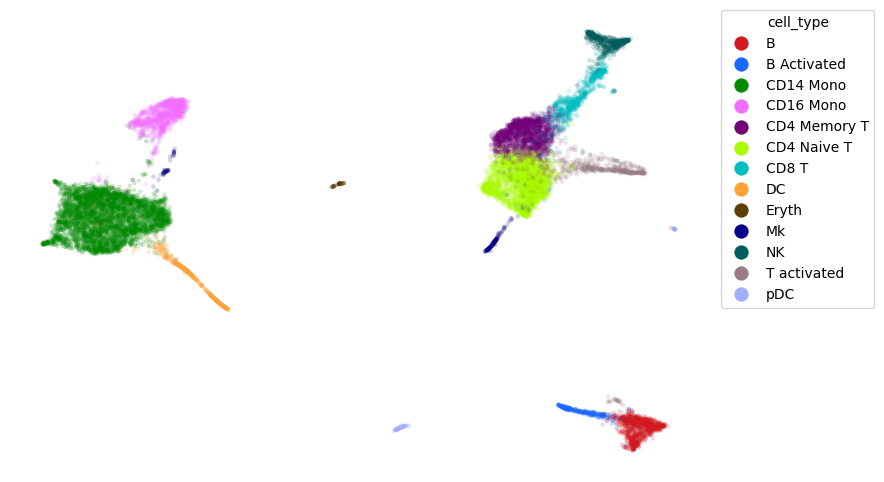

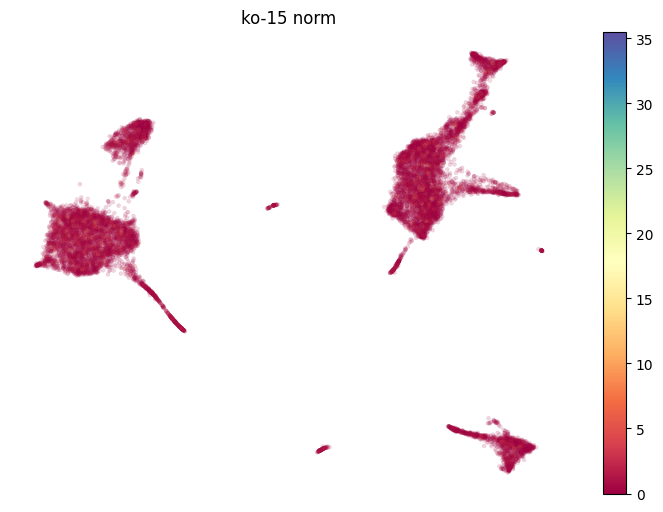

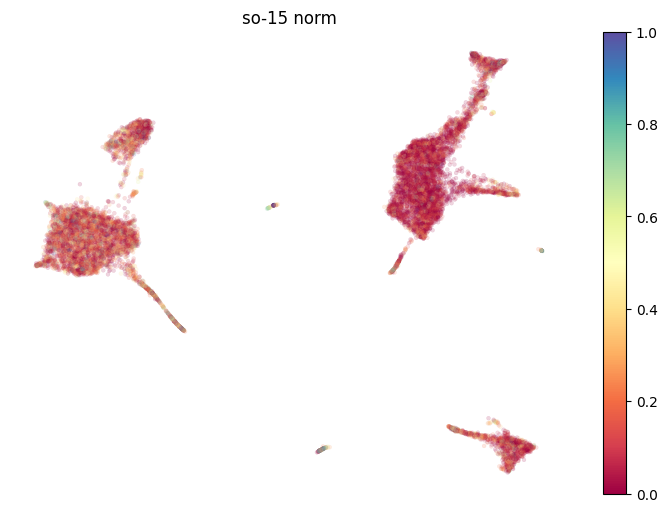

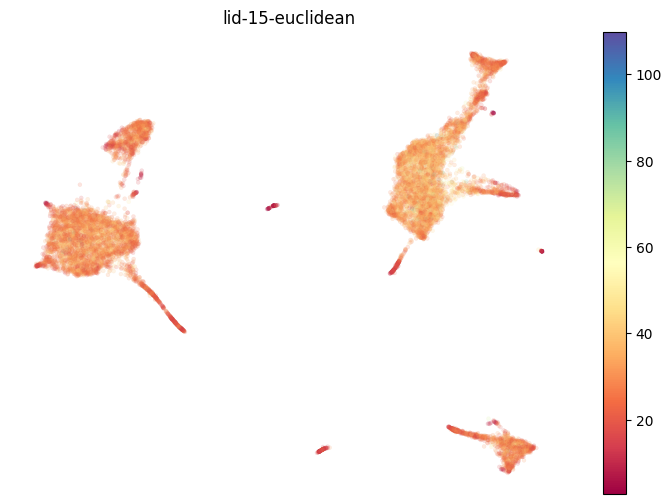

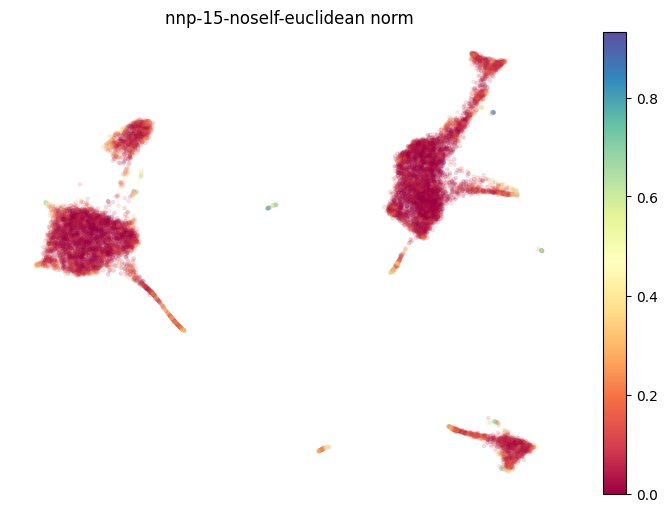

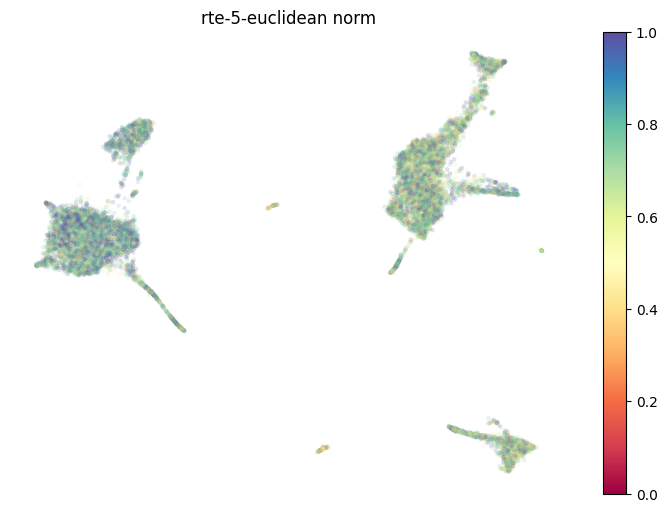

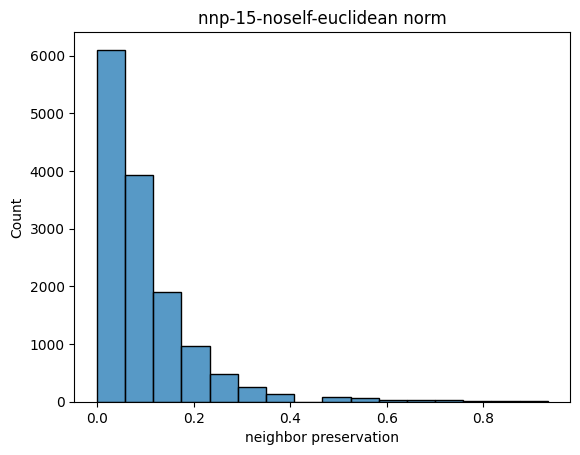

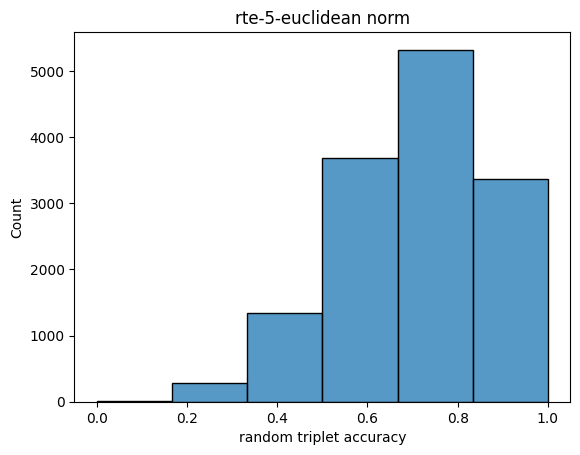

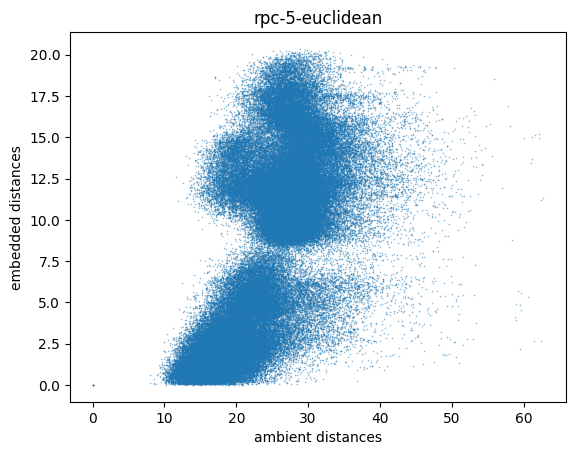

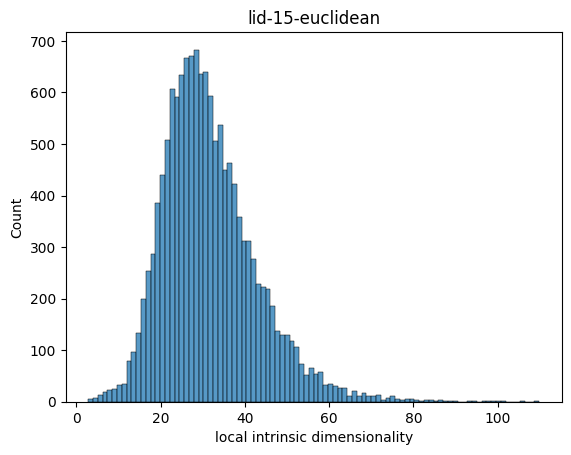

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.744381741552968), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=0.6323068737983704, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.07965807081458198), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.14275448246303307), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.2356620711003167), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [5]:
umap.run("kang")["evaluations"]

## Configuring Extra Plots

There is a similar "action config" syntax for the extra diagnostic plots if you want to control
their behavior: provide the name of the plot and then a dictionary of attributes. Below the random
pair distance scatterplot has a best fit line added by isotonic regression and we have reduced the
opacity of the scatter points (the latter more to demonstrate how to do it rather than because
it's a particularly good idea).

Going in the opposite direction additionally, I show how the `color_by` argument can just be the 
name of the plot, the same  arguments that are explicitly used by `pl.diag_plots()` are used as 
defaults.

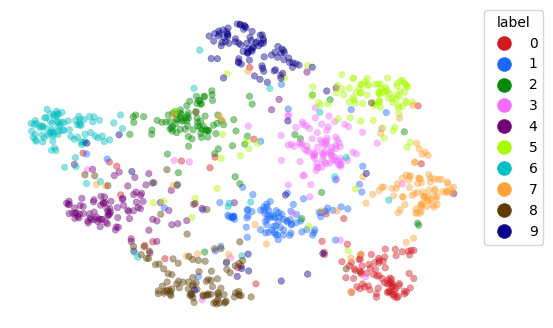

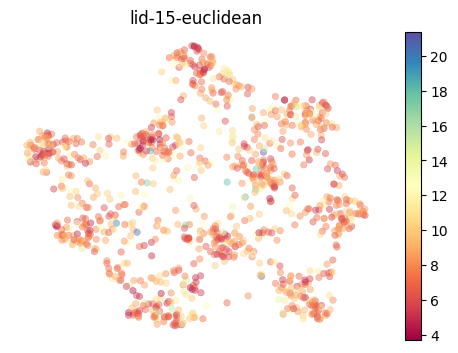

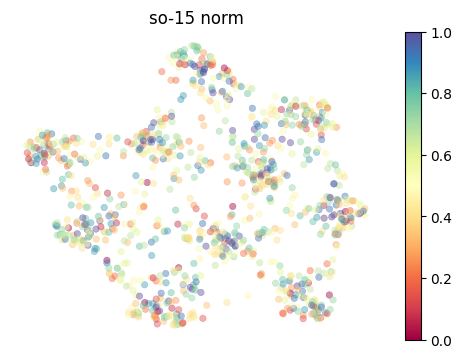

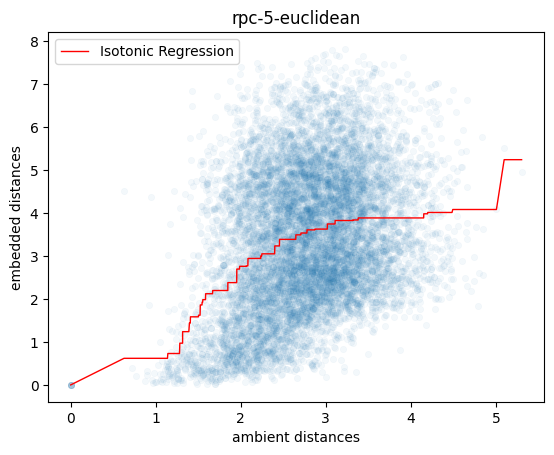

In [6]:
_ = pl.create_pipeline(
    method=pl.embedder(
        "umap",
    ),
    plot=dict(
        color_by=["lid", "so"],
        extras=[
            (
                "rpscatter",
                dict(
                    alpha_scale=0.05,
                    cex=20.0,
                    show_isotonic=True,
                ),
            )
        ],
    ),
).run("s1k")

## Controlling plots in `standard_eval`

`standard_eval` only provides the scatter plot with coloring by category by default. You can
control it with the `extra_plot` argument, which behaves like the `plot` argument in
`create_pipeline`. Below is an example:

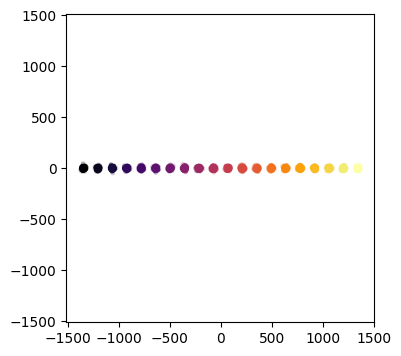

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.9956200000000001), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=0.999754011631012, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.05185333333333333), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.14694000000000002), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.3693353333333333), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [7]:
pl.standard_eval(
    method="pca",
    dataset="gaussian-linear",
    extra_plot={
        "show_axes": True,
        "equal_axes": True,
        "palette": "inferno",
        "legend": False,
    },
)

## Interactive Plots with Plotly

You can also render the embedding plot using plotly for an interactive plot you can pan and zoom.
To do this set the `backend` to `"plotly"` in the `extra_plot` argument in `standard_eval`,
or equivalently in the `plot` argument of `create_pipeline`.

In [ ]:
pl.standard_eval(
    method="umap",
    dataset="kang",
    extra_plot={
        "backend": "plotly",
    },
)

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.7565968997785556), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=0.6682379245758057, info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.07989618306069482), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.14327166226159013), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.23578636569278758), info={'metric': 'euclidean', 'n_neighbors': 150})]